# `Automatisierte` SCHÄTZUNG TEILNEHMERZAHL PEGIDA 11.05.2015

Inspiriert durch https://durchgezaehlt.wordpress.com/2015/05/12/schatzung-teilnehmerzahl-pegida-11-05-2015/

Hier die automatische Variante. :)

### 1. Download Video from YouTube

In [1]:
!youtube-dl http://youtu.be/5K8bZHfjWcg

[youtube] Setting language
[youtube] Confirming age
[youtube] 5K8bZHfjWcg: Downloading webpage
[youtube] 5K8bZHfjWcg: Downloading video info webpage
[youtube] 5K8bZHfjWcg: Extracting video information
[youtube] 5K8bZHfjWcg: Downloading DASH manifest
[download] Pegida am 11.05.2015 in Dresden-5K8bZHfjWcg.mp4 has already been downloaded


### 2. Extract 1 image every 10 seconds

this depends, for sure, on the original fps of the video and the walking speed of the people

see http://www.linuxers.org/tutorial/how-extract-images-video-using-ffmpeg

In [2]:
!ffmpeg -i Pegida\ am\ 11.05.2015\ in\ Dresden-5K8bZHfjWcg.mp4 -qscale:v 2 -r 1/10 -s hd720 screenshots/pegida_demo_11052015_%3d.jpg

ffmpeg version 2.4.3 Copyright (c) 2000-2014 the FFmpeg developers
  built on Nov  6 2014 13:37:15 with Apple LLVM version 6.0 (clang-600.0.54) (based on LLVM 3.5svn)
  configuration: --prefix=/opt/local --enable-swscale --enable-avfilter --enable-avresample --enable-libmp3lame --enable-libvorbis --enable-libopus --enable-libtheora --enable-libschroedinger --enable-libopenjpeg --enable-libmodplug --enable-libvpx --enable-libspeex --enable-libass --enable-libbluray --enable-lzma --enable-gnutls --enable-fontconfig --enable-libfreetype --enable-libfribidi --disable-indev=jack --disable-outdev=xv --mandir=/opt/local/share/man --enable-shared --enable-pthreads --cc=/usr/bin/clang --enable-vda --arch=x86_64 --enable-yasm --enable-gpl --enable-postproc --enable-libx264 --enable-libxvid
  libavutil      54.  7.100 / 54.  7.100
  libavcodec     56.  1.100 / 56.  1.100
  libavformat    56.  4.101 / 56.  4.101
  libavdevice    56.  0.100 / 56.  0.100
  libavfilter     5.  1.100 /  5.  1.100
  li

### 3. Code some Stuff

In [3]:
import cv2
print cv2.__version__

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import Image

import os

2.4.11


this little helper code is from here, in case you want to mark people in images: http://stackoverflow.com/questions/28476343/how-to-correctly-use-peopledetect-py-in-opencv

In [4]:
def inside(r, q):
    rx, ry, rw, rh = r
    qx, qy, qw, qh = q
    return rx > qx and ry > qy and rx + rw < qx + qw and ry + rh < qy + qh

In [5]:
def draw_detections(img, rects, thickness = 1):
    for x, y, w, h in rects:
        # the HOG detector returns slightly larger rectangles than the real objects.
        # so we slightly shrink the rectangles to get a nicer output.
        pad_w, pad_h = int(0.15*w), int(0.05*h)
        cv2.rectangle(img, (x+pad_w, y+pad_h), (x+w-pad_w, y+h-pad_h), (0, 255, 0), thickness)

### Histogram of oriented gradients (HOG) Descriptor for People Detection

see undocumented OpenCV: https://github.com/Itseez/opencv/blob/master/samples/python2/peopledetect.py

In [6]:
def detectpeople(img, hitThreshold=-0.3, winStride=(6,6), padding=(32,32), scale=1.05, crowd_factor=1.8, save_result_as='None'):
    hog = cv2.HOGDescriptor()
    hog.setSVMDetector( cv2.HOGDescriptor_getDefaultPeopleDetector() )

    found, w = hog.detectMultiScale(img, hitThreshold=hitThreshold, winStride=winStride, padding=padding, scale=scale)
    
    found_filtered = []
    for ri, r in enumerate(found):
        for qi, q in enumerate(found):
            if ri != qi and inside(r, q):
                break
        else:
            found_filtered.append(r)

    #print '%d (%d) found' % (len(found_filtered), len(found))
    
    # because of hidden people behind others,
    # we multiply with empirically choosen crowd factor 
    people = int(len(found_filtered)*crowd_factor)

    
    if save_result_as!='None':
        #draw_detections(img, found)
        draw_detections(img, found_filtered, 3)

        plt.title(u"%i Personen in Bild #%s geschätzt" % (people, save_result_as[-14:-11]))
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.tight_layout()
        plt.savefig(save_result_as, dpi=150)
        plt.close()

    return people

# Look at all the Pegidas!

![](http://i.imgur.com/aW8KocQ.jpg)

In [7]:
screenshots = [f for f in os.listdir('./screenshots') if f.endswith('.jpg') and not f.endswith('marked.jpg')]

In [8]:
#screenshots = ['pegida_demo_11052015_022.jpg']

In [9]:
demonstrationszug = []
for jpg in screenshots:
    
    jpgname = './screenshots/' + jpg
    
    capture = cv2.cv.CaptureFromFile(jpgname)
    if not capture:
        print "Error loading video file"
        break

    img = cv2.cv.QueryFrame(capture)
    img = np.array(img[:])

    people = detectpeople(img, save_result_as=jpgname[:-4]+'_marked.jpg')
    
    print(u'%i Teilnehmer auf \'%s\' geschätzt.' % (people, jpg))
    
    demonstrationszug.append(people)

32 Teilnehmer auf 'pegida_demo_11052015_005.jpg' geschätzt.
75 Teilnehmer auf 'pegida_demo_11052015_006.jpg' geschätzt.
63 Teilnehmer auf 'pegida_demo_11052015_007.jpg' geschätzt.
72 Teilnehmer auf 'pegida_demo_11052015_008.jpg' geschätzt.
50 Teilnehmer auf 'pegida_demo_11052015_009.jpg' geschätzt.
43 Teilnehmer auf 'pegida_demo_11052015_010.jpg' geschätzt.
36 Teilnehmer auf 'pegida_demo_11052015_011.jpg' geschätzt.
34 Teilnehmer auf 'pegida_demo_11052015_012.jpg' geschätzt.
34 Teilnehmer auf 'pegida_demo_11052015_013.jpg' geschätzt.
27 Teilnehmer auf 'pegida_demo_11052015_014.jpg' geschätzt.
34 Teilnehmer auf 'pegida_demo_11052015_015.jpg' geschätzt.
32 Teilnehmer auf 'pegida_demo_11052015_016.jpg' geschätzt.
46 Teilnehmer auf 'pegida_demo_11052015_017.jpg' geschätzt.
14 Teilnehmer auf 'pegida_demo_11052015_018.jpg' geschätzt.
10 Teilnehmer auf 'pegida_demo_11052015_019.jpg' geschätzt.
28 Teilnehmer auf 'pegida_demo_11052015_020.jpg' geschätzt.
48 Teilnehmer auf 'pegida_demo_11052015_

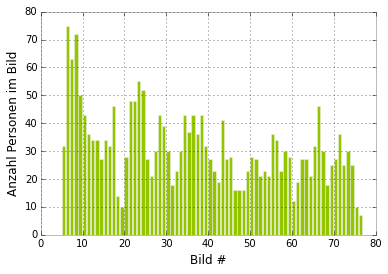

In [10]:
plt.bar([b+5 for b in range(len(demonstrationszug))], demonstrationszug)
plt.xlabel('Bild #')
plt.ylabel('Anzahl Personen im Bild')

In [11]:
print('Insgesamt %i Teilnehmer.' % np.sum(demonstrationszug))

Insgesamt 2252 Teilnehmer.


manuell wurden durch [STUDENTENGRUPPE "DURCHGEZAEHLT"](https://durchgezaehlt.wordpress.com) 2.597 Personen im Demonstrationszug gezählt

## Fehlerquellen

* doppelt gezähle Personen (auf 2 Fotos abgebildet)
* nicht gezählte Personen (Verdeckte)
* falscher `crowd_factor` (dieser stimmt mit Sicherheit nur für dieses Beispiel)

Fragen? [@Balzer82](https://twitter.com/balzer82)

`CC-BY-SA 2.0 Lizenz`